
Import the data and prepare it--Perform EDA
    --do train test split MANUALLY without using scikit learn
    --calculate the accuracy manually using cross validation score,confusion matrix,test accuracy
    -- draw heatmap-- save model-- import model and use it on any other dataset

#Admission_predict data

    Serial no=                  Roll number of a student
    GRE score, TOEFL score
    University rating=          Rating the univ got from the education board
    SOP =                       Statement of purpose writing score
    LOR =                       Letter of recommendations score
    CGPA
    Research=                   Research paper published?   1=YEs, 0=No        #categorical var
    Chance of admission=        CHance of the student getting admitted into the college

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data= pd.read_csv("D:/iAnalyst/Machine Learning/Task from scratch/Admission_Predict_MLR.csv")
df=data.copy()

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.columns   
df.columns= df.columns.str.strip() #removes the unnecessary spaces in the names of the columns
df= df.drop("Serial No.",axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


# EDA

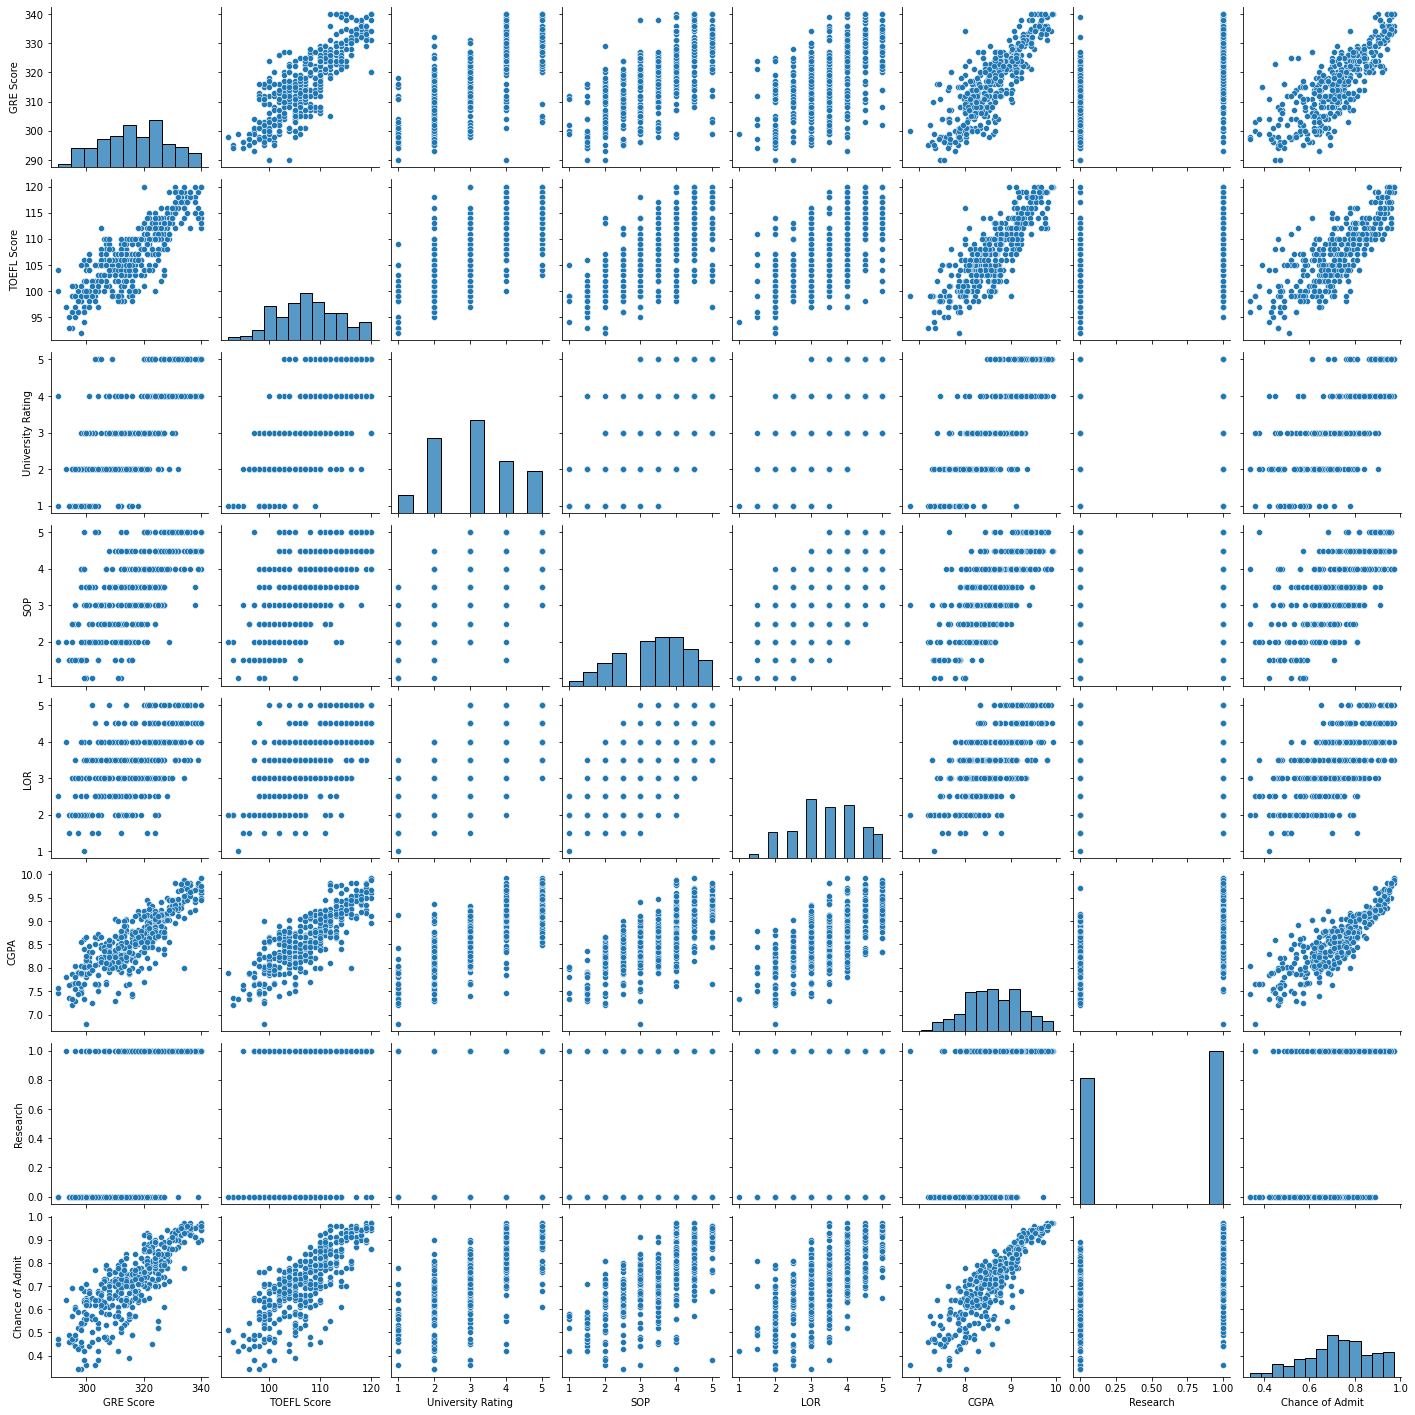

In [10]:
sns.pairplot(df)

<AxesSubplot:xlabel='Chance of Admit', ylabel='Count'>

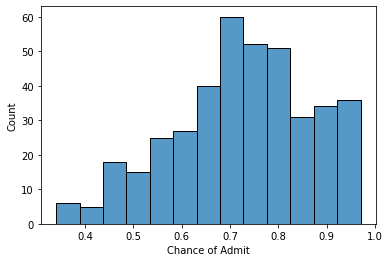

In [11]:
sns.histplot(df["Chance of Admit"])
#sns.histplot(df["GRE Score"]) 
#sns.histplot(df["CGPA"]) 


<AxesSubplot:>

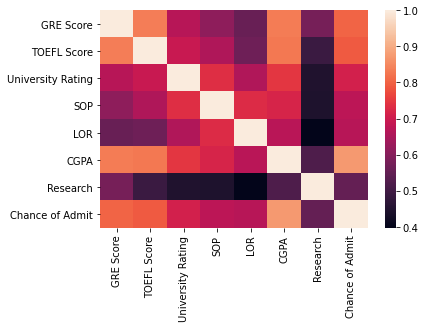

In [12]:
sns.heatmap(df.corr())

# Train Test Split

In [13]:
#SPlitting the data manually without using sklearn

In [14]:
# Shuffling the whole dataset 
shuffle_df = df.sample(frac=1)

# Define a size for your train set 
train_size = int(0.7 * len(df))   #400*0.7 = 280 samples for train

# Split your dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [15]:
X_train = pd.DataFrame(train_set.drop(['Chance of Admit'], axis=1))
y_train = pd.DataFrame(train_set['Chance of Admit'])
X_test = pd.DataFrame(test_set.drop(['Chance of Admit'], axis=1))
y_test = pd.DataFrame(test_set['Chance of Admit'])


In [16]:
y_test

,Chance of Admit
210,0.79
28,0.46
391,0.71
274,0.58
318,0.79
...,...
26,0.76
140,0.84
253,0.93
348,0.57


In [17]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [18]:
print(lm.intercept_)

[-1.19814846]


In [19]:
lm.coef_[0]

array([ 0.00155525,  0.00306628,  0.0104453 , -0.00995518,  0.02902515,
        0.11469753,  0.02718373])

In [20]:
X= df.drop(['Chance of Admit'], axis=1)
coeff_df = pd.DataFrame(lm.coef_[0],X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
GRE Score,0.001555
TOEFL Score,0.003066
University Rating,0.010445
SOP,-0.009955
LOR,0.029025
CGPA,0.114698
Research,0.027184


In [21]:
max(df['CGPA'])

9.92

#Interpreting the coefficients:

    Holding all other features fixed, a 1 unit increase in GRE score (0-340) is associated with an increase of 0.21% or 0.001 in chance of getting admitted
    
    Holding all other features fixed, a 1 unit increase in TOEFL score (0-120) is associated with an increase of 0.31% or 0.0031 in chance of getting admitted.
    
    Holding all other features fixed, a 1 unit increase in University rating (1-5) is associated with an increase of 0.7% or 0.007 in chance of getting admitted.
    
    Holding all other features fixed, a 1 unit increase in SOP (1-5) is associated with an increase of 0.22% or 0.0022 in chance of getting admitted.
    
    Holding all other features fixed, a 1 unit increase in LOR (1-5) is associated with an increase of 2.2% or 0.022 in chance of getting admitted..
    
    Holding all other features fixed, a 1 unit increase in CGPA (1-10) is associated with an increase of 12.31% or 0.1231 in chance of getting admitted.
    
    Holding all other features fixed, a 1 unit increase in Research (0-1) is associated with an increase of 1.95% or 0.0.195 in chance of getting admitted.

In [22]:
#Predictions

In [23]:
pred= lm.predict(X_test)

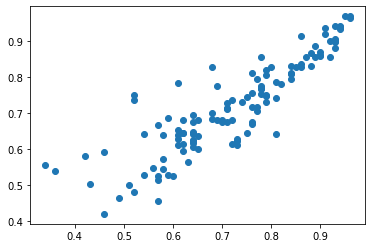

In [24]:
plt.scatter(y_test,pred)  #This plot shows the difference values of y test values and the predicted values. If we get points exactly along the diagonal line then there is very less error.

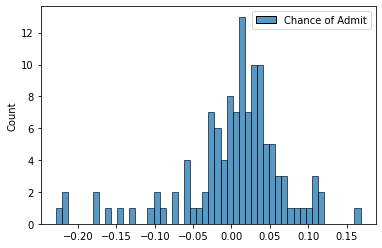

In [25]:
sns.histplot((y_test-pred),bins=50);   #y test minus pred gives the diff betw actual and predicted values. The values close to zero indicates good fit

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Coefficient of determination** (R^2) is known as coefficient of determination. 

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **Coefficient of determination** greater is better (Close to 1).
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

    Steps for Calculating the MSE using Python
    
    Calculate the difference between each pair of the observed and predicted values.
    
    Take the square of the difference value.
    
    Add each of the squared differences to find the cumulative values.
    
    Divide the cumulative value by the total number of items in the list.

In [26]:
#calculate MSE, RMSE, then R2

MSE = np.square(np.subtract(y_test,pred)).mean()  

import math
RMSE= math.sqrt(np.square(np.subtract(y_test,pred)).mean())   #taking square root of MSE

In [27]:
print(MSE)

#lower the MSE the higher the accuracy of prediction as there would be excellent match between the 
#actual and predicted data set

Chance of Admit    0.004538
dtype: float64


In [28]:
print(RMSE)

'''Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). 
Residuals are a measure of how far from the regression line data points are;
RMSE is a measure of how spread out these residuals are.
In other words, it tells you how concentrated the data is around the line of best fit.'''

#For eg, --

0.06736429012529542


'Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). \nResiduals are a measure of how far from the regression line data points are;\nRMSE is a measure of how spread out these residuals are.\nIn other words, it tells you how concentrated the data is around the line of best fit.'

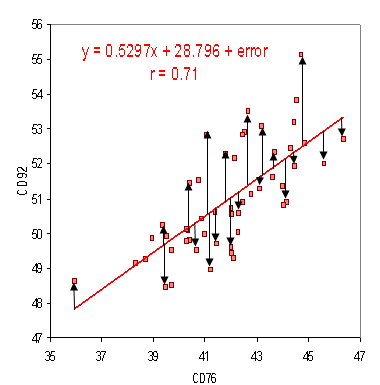

In [29]:
SSR= np.square(np.subtract(y_test,pred))
SSR

,Chance of Admit
210,0.000778
28,0.001582
391,0.000004
274,0.000045
318,0.001838
...,...
26,0.000023
140,0.001968
253,0.000111
348,0.013169


In [30]:
SST= np.square(np.subtract(y_test,y_test.mean()))
SST

,Chance of Admit
210,0.004807
28,0.067947
391,0.000114
274,0.019787
318,0.004807
...,...
26,0.001547
140,0.014240
253,0.043820
348,0.022700


In [31]:
#rsquare = 1- (SSR/SST)
SSR= (np.square(np.subtract(y_test,pred))).sum()
SST= (np.square(np.subtract(y_test,y_test.mean()))).sum()
Rsq= 1-(SSR/SST)
print(Rsq)

Chance of Admit    0.775825
dtype: float64


,Chance of Admit
391,0.71
274,0.58
318,0.79
257,0.78
111,0.69
...,...
26,0.76
140,0.84
253,0.93
348,0.57


#adjusted R2 = 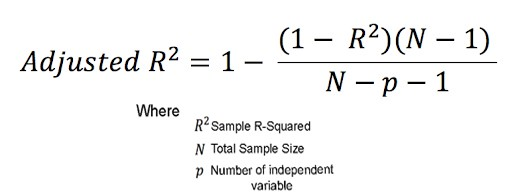

    This means that if we take all the X variables then we get accuracy of 0.78 of our model.
    But let's try individual X variables or subset of all X variables to check if we get better accuracy.
    To do that we willhave to do subset selection.
    Also calculate adj R2

In [32]:
#calculating adjusted R2-
#def adjrsq():
adjrsq = 1- (((1-Rsq)*(len(df)-1))/(len(df)- len(df.columns)-1-1))    #len(df.columns) includes all X and Y. But we need only X vars. SO len(df)-1 Y var. 
adjrsq

Chance of Admit    0.770652
dtype: float64

#Adj R2 increases only when the variables are significant. AdjR2 <= R2

In [33]:
from itertools import combinations
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

Chance of Admit    0.775825
dtype: float64

In [66]:
def R_sq(y_test,pred):
    SSR= (np.square(np.subtract(y_test,pred))).sum()
    SST= (np.square(np.subtract(y_test,y_test.mean()))).sum()
    Rsq= 1-(SSR/SST)
    return Rsq

In [67]:
R_sq(y_test, pred)

Chance of Admit    0.775825
dtype: float64

In [70]:
def Adjusted_R(y_test,pred):
    N = len(y_test)
    p = len(df.columns)-2  #not taking target var and serial number
    Adjust_R = 1-(((1-R_sq(y_test,pred))*(N-1))/(N-p-1))    #len(df.columns) includes all X and Y. But we need only X vars. SO len(df)-1 Y var. 
    Adj_Rsq = np.round(Adjust_R,decimals=3)
    return Adj_Rsq

In [71]:
Adjusted_R(y_test,pred)

Chance of Admit    0.764
dtype: float64

# Subset Selection

In [72]:
def Subset_Selection(X,y):
    com=[]
    Rsq_list=[]
    Adj_list=[]
    SSR = []
    Num_o_X = []
    X = pd.DataFrame(X)
    X_col  = X.columns
    for i in range(1,len(X_col)+1):
        #print(i)
        comb = list(combinations(X_col,i))
        #print(comb)

        for col in comb:
            #print(list(col))

            X = df[list(col)]
            
            lm = LinearRegression()
            lm.fit(X,y)         #fitting all the data and not just training data  ##X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size=0.8,random_state=101)
            y_pred = lm.predict(X)
            Rsq = R_sq(y , y_pred)
            Adj_ = Adjusted_R(y, y_pred)
            SSR_ = ((np.array(y) - np.array(y_pred))**2).sum()
            com.append(col)
            Rsq_list.append(Rsq)
            Adj_list.append(Adj_)
            SSR.append(np.round(SSR_,decimals=3))
            Num_o_X.append(len(col))
            d = {'col':com,'Rsq':Rsq_list,'Adj_R^2':Adj_list ,'SSR':SSR,"Number_of_X's":Num_o_X}
    Eval = pd.DataFrame(d) #columns=['col','Rsq','Adj_R^2']  
    
    return Eval.sort_values('Adj_R^2',ascending=False)

In [73]:
#now try fitting the train data and then the test data  #see jayesh multiple reg code

In [74]:
'''X_col  = X.columns

for i in range(1,len(X_col)+1):
    print(i)
    comb = list(combinations(X_col,i))
    #print(comb)

    for col in comb:
        print(list(col))
        X = df[list(col)]'''

'X_col  = X.columns\n\nfor i in range(1,len(X_col)+1):\n    print(i)\n    comb = list(combinations(X_col,i))\n    #print(comb)\n\n    for col in comb:\n        print(list(col))\n        X = df[list(col)]'

In [75]:
X= df.drop(['Chance of Admit'], axis=1)
y= df['Chance of Admit']

In [76]:
e= Subset_Selection(X,y)
e.groupby("Number_of_X's").describe()["Adj_R^2"]   
#Take the no. of X where adj R2 should be maximum
#either take AdjR2 or SSR. Try for both but take only those no. of X where they are minimum

,count,mean,std,min,25%,50%,75%,max
Number_of_X's,,,,,,,,
1,7.0,0.528571,0.154737,0.295,0.4440,0.498,0.6300,0.759
2,21.0,0.667952,0.089728,0.516,0.5710,0.688,0.7640,0.778
3,35.0,0.726429,0.059398,0.582,0.6995,0.720,0.7780,0.791
4,35.0,0.758114,0.038365,0.629,0.7265,0.779,0.7870,0.796
5,21.0,0.777476,0.025093,0.726,0.7520,0.789,0.7950,0.800
6,7.0,0.790429,0.017164,0.752,0.7940,0.796,0.7985,0.800
7,1.0,0.800000,NaN,0.800,0.8000,0.800,0.8000,0.800


In [77]:
e.groupby("Number_of_X's").describe()["SSR"]  #Take the no. of X where SSR should be minimum #SSR= sum of sq of residuals and not regressors

,count,mean,std,min,25%,50%,75%,max
Number_of_X's,,,,,,,,
1,7.0,3.766571,1.234976,1.926,2.9585,4.010,4.4410,5.631
2,21.0,2.654143,0.716631,1.777,1.8870,2.495,3.4320,3.867
3,35.0,2.186343,0.475212,1.671,1.7710,2.236,2.4035,3.345
4,35.0,1.933029,0.307170,1.634,1.7010,1.765,2.1865,2.968
5,21.0,1.779095,0.200060,1.601,1.6360,1.685,1.9830,2.188
6,7.0,1.674857,0.136271,1.596,1.6125,1.629,1.6470,1.980
7,1.0,1.595000,NaN,1.595,1.5950,1.595,1.5950,1.595


HEre we can see that at no. of X=5 we are getting max R2 while if we see SSR we get min val for no of X = 5

In [78]:
e[e["Number_of_X\'s"] == 5].iloc[:3]   #taking the highest R2

,col,Rsq,Adj_R^2,SSR,Number_of_X's
107,"(GRE Score, TOEFL Score, LOR, CGPA, Research)",0.802722,0.800,1.601,5
111,"(GRE Score, University Rating, LOR, CGPA, Rese...",0.799837,0.797,1.624,5
116,"(TOEFL Score, University Rating, LOR, CGPA, Re...",0.798902,0.796,1.632,5


In [79]:
e[e["Number_of_X\'s"] == 5].iloc[:1].col 

107    (GRE Score, TOEFL Score, LOR, CGPA, Research)
Name: col, dtype: object

Now only taking these variables and finding its AdjR2, SSR, ... also find RMSE.

In [80]:
x = X[['GRE Score', 'TOEFL Score', 'LOR', 'CGPA', 'Research']]
Subset_Selection(x,y)[:1]

,col,Rsq,Adj_R^2,SSR,Number_of_X's
30,"(GRE Score, TOEFL Score, LOR, CGPA, Research)",0.802722,0.8,1.601,5


In [81]:
#code for running SIMPLE linear regression from scratch
#https://www.analyticsvidhya.com/blog/2021/06/getting-started-with-machine-learning%E2%80%8A-%E2%80%8Aimplementing-linear-regression-from-scratch/

In [82]:
import pickle

In [83]:
# Save to file in the current working directory
pkl_filename = "Model_regression_admissionprediction_MLR.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lm, file)  